# Fraud-u-not ML Model Training

### Import Libaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'gray'})

from sklearn.model_selection import train_test_split 

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

### Import Dataset

In [2]:
fraudData = pd.read_csv('./card_transdata.csv')

fraudData

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


### Null value checks

In [3]:
print("Null values:")
fraudData.isnull().sum()

Null values:


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

### Data Exploration / Transformation

In [4]:
print("percentage of fraud: ", fraudData['fraud'].value_counts().loc[1.0]  /  fraudData.shape[0] * 100, "%")

fraudData['fraud'].value_counts()

percentage of fraud:  8.7403 %


0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [5]:
fraudData.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


###### Catergory Fraud effect

In [6]:
catergoryFraudData = pd.DataFrame(index=['Did Not', 'Did', 'Perc Change'])

for c in fraudData.columns:
    if fraudData[c].nunique() <= 2 and c != 'fraud':
        # Gets the mean of non fraud for the column
        fraudMean0 = fraudData.loc[fraudData[c] == 0, 'fraud'].mean() * 100
        # Gets the mean of  fraud for the column
        fraudMean1 = fraudData.loc[fraudData[c] == 1, 'fraud'].mean() * 100
        # Calculates the percente change from min to max
        change = (max(fraudMean1, fraudMean0)- min(fraudMean1, fraudMean0)) / min(fraudMean1, fraudMean0) * 100
        change = str(round(change, 2)) + "%"
        
        # Adds the data to category dataframe
        catergoryFraudData[c] = [fraudMean0, fraudMean1, change]

catergoryFraudData

,repeat_retailer,used_chip,used_pin_number,online_order
Did Not,8.84488,10.0051,9.68766,1.34269
Did,8.72625,6.39557,0.27135,12.714
Perc Change,1.36%,56.44%,3470.17%,846.9%


##### Numeric Transformer

In [7]:
def numericTrans(colName ,ranges, newName):
    # stores data
    newData = []
    for index,x in fraudData.iterrows():
        # Gets the value at the row
        curVal = x[colName]
        # stores the encoded val in the range
        encodedVal = len(ranges) - 1
        # Loops throught hte range
        for i in range(len(ranges) - 2, -1, -1):
            # if curval is less than then this value is closer to the target value
            if curVal <= ranges[i]:
                encodedVal = i
            # other wise it's not close to break
            else:
                break
        # Adds the encoded value to the data arr
        newData.append(encodedVal)
    # Adds the data to the panda dataframe
    fraudData[newName] = newData
    

##### Numeric Fraud Effect

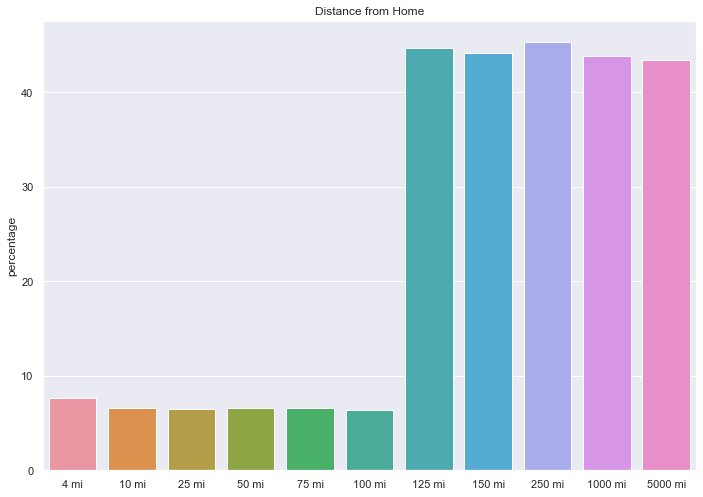

,percentage,Count
4 mi,7.660591,257082
10 mi,6.588012,243852
25 mi,6.535576,242427
50 mi,6.595591,131315
75 mi,6.593538,50231
100 mi,6.402150,25304
125 mi,44.664666,14329
150 mi,44.164530,8971
250 mi,45.328830,15692
1000 mi,43.846378,10311


In [8]:
distanceRanges = [4, 10, 25, 50, 75, 100, 125, 150,250,1000, 5000]

numericTrans('distance_from_home', distanceRanges, 'distance_from_home_encoded')

distanceHomeFraudData = pd.DataFrame(index=[str(x) + " mi" for x in distanceRanges])

mean = []
count = []

for i in range(len(distanceRanges)):
    c = distanceRanges[i]
    cb = distanceRanges[i - 1] if i > 0 else 0
    fraudRangeData = fraudData.loc[(fraudData['distance_from_home'] <= c) &
                                   (fraudData['distance_from_home'] >= cb), 'fraud']
    fraudMean = fraudRangeData.mean()
    mean.append(fraudMean * 100)
    count.append(fraudRangeData.shape[0])
    
distanceHomeFraudData['percentage'] = mean
distanceHomeFraudData['Count'] = count


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=distanceHomeFraudData.index, y=distanceHomeFraudData['percentage']).set(title='Distance from Home')
plt.show()

distanceHomeFraudData

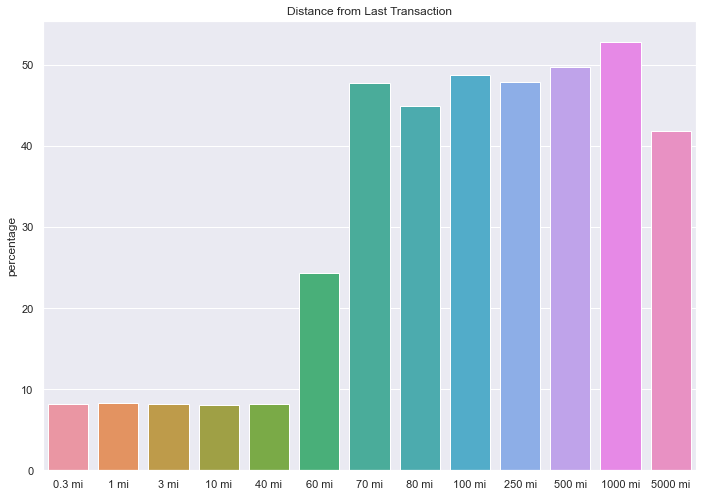

,percentage,Count
0.3 mi,8.136526,251938
1 mi,8.245019,248356
3 mi,8.165107,229354
10 mi,8.003406,170265
40 mi,8.137864,80021
60 mi,24.285050,8602
70 mi,47.737844,2365
80 mi,44.874851,1678
100 mi,48.681166,2161
250 mi,47.817746,4170


In [9]:
distanceRanges = [0.3, 1, 3, 10, 40, 60, 70, 80, 100, 250, 500, 1000, 5000]

numericTrans('distance_from_last_transaction', distanceRanges, 'distance_from_last_transaction_encoded')

distanceTranFraudData = pd.DataFrame(index=[str(x) + " mi" for x in distanceRanges])

mean = []
count = []

for i in range(len(distanceRanges)):
    c = distanceRanges[i]
    cb = distanceRanges[i - 1] if i > 0 else 0
    fraudRangeData = fraudData.loc[(fraudData['distance_from_last_transaction'] <= c) &
                                   (fraudData['distance_from_last_transaction'] >= cb), 'fraud']
    fraudMean = fraudRangeData.mean()
    mean.append(fraudMean * 100)
    count.append(fraudRangeData.shape[0])
    
distanceTranFraudData['percentage'] = mean
distanceTranFraudData['Count'] = count


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(
    x=distanceTranFraudData.index, y=distanceTranFraudData['percentage']
).set(title='Distance from Last Transaction')
plt.show()

distanceTranFraudData

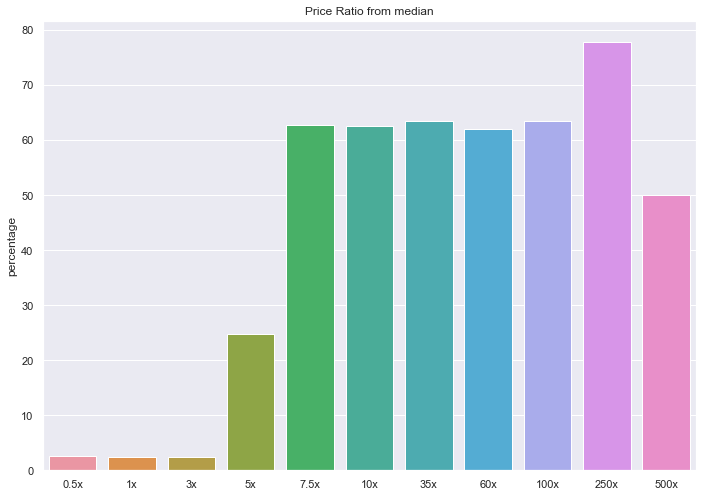

,percentage,Count
0.5x,2.513131,264451
1x,2.504357,236428
3x,2.478859,340923
5x,24.815428,86958
7.5x,62.769690,38192
10x,62.587551,15134
35x,63.459203,17293
60x,61.931818,528
100x,63.414634,82
250x,77.777778,9


In [10]:
ratioRanges = [0.5, 1, 3, 5, 7.5, 10, 35, 60, 100, 250, 500]

numericTrans('ratio_to_median_purchase_price', ratioRanges, 'ratio_to_median_purchase_price_encoded')

ratioFraudData = pd.DataFrame(index=[str(x) + "x" for x in ratioRanges])

mean = []
count = []

for i in range(len(ratioRanges)):
    c = ratioRanges[i]
    cb = ratioRanges[i - 1] if i > 0 else 0
    fraudRangeData = fraudData.loc[(fraudData['ratio_to_median_purchase_price'] <= c) &
                                   (fraudData['ratio_to_median_purchase_price'] >= cb), 'fraud']
    fraudMean = fraudRangeData.mean()
    mean.append(fraudMean * 100)
    count.append(fraudRangeData.shape[0])
    
ratioFraudData['percentage'] = mean
ratioFraudData['Count'] = count

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(
    x=ratioFraudData.index, y=ratioFraudData['percentage']
).set(title='Price Ratio from median')
plt.show()

ratioFraudData

In [11]:
fraudData

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,distance_from_home_encoded,distance_from_last_transaction_encoded,ratio_to_median_purchase_price_encoded
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,4,1,2
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,2,0,2
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,1,1,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,0,3,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,0,0,2
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,2,2,2
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,0,2,0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,1,0,0


### Train/Valid/Test Split

In [12]:
y = fraudData['fraud']
fraudData.drop(['fraud'], axis=1, inplace=True)
# 81% Train
# 9 % Valid
# 10 % Test

trainValidX, testX, trainValidY, testY = train_test_split(fraudData, y, test_size=0.1, random_state=42)
trainX, validX, trainY, validY = train_test_split(trainValidX, trainValidY, test_size=0.1, random_state=42)

validX

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,distance_from_home_encoded,distance_from_last_transaction_encoded,ratio_to_median_purchase_price_encoded
828228,30.032938,11.749312,0.167593,1.0,1.0,0.0,1.0,3,4,0
634768,17.204628,7.416173,0.614602,1.0,1.0,0.0,1.0,2,3,1
208115,1.972947,0.677026,0.894725,1.0,0.0,0.0,0.0,0,1,1
927656,22.996303,17.878131,1.030724,1.0,0.0,0.0,0.0,2,4,2
457386,7.612797,0.187840,6.210832,1.0,1.0,0.0,1.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...
351817,3.871414,15.032641,1.434489,1.0,0.0,0.0,1.0,0,4,2
323747,0.874583,2.845198,0.119589,0.0,0.0,0.0,1.0,0,2,0
289225,18.061769,0.623783,4.331394,1.0,0.0,0.0,1.0,2,1,3
185300,1.939640,0.144673,0.591281,1.0,0.0,0.0,1.0,0,0,1


### Train Data Balancing

###### Over Sampling

In [13]:
ros = RandomOverSampler(random_state=33)

print("Before Over Sampling:\n", trainY.value_counts())

Xoversampled, Yoversampled = ros.fit_resample(trainX, trainY)

print("After Over Sampling:\n", Yoversampled.value_counts())

Xoversampled

Before Over Sampling:
 0.0    739161
1.0     70839
Name: fraud, dtype: int64
After Over Sampling:
 1.0    739161
0.0    739161
Name: fraud, dtype: int64


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,distance_from_home_encoded,distance_from_last_transaction_encoded,ratio_to_median_purchase_price_encoded
0,0.667018,7.975278,1.006641,0.0,0.0,1.0,0.0,0,3,2
1,1.689712,0.222397,0.528884,0.0,1.0,0.0,0.0,0,0,1
2,5.863488,0.983620,0.416893,1.0,1.0,0.0,0.0,1,1,0
3,23.039940,2.535416,0.103537,1.0,0.0,0.0,0.0,2,2,0
4,1.893016,2.750843,1.954781,0.0,0.0,0.0,0.0,0,2,2
...,...,...,...,...,...,...,...,...,...,...
1478317,65.575434,1.818751,25.285618,1.0,1.0,0.0,1.0,4,2,6
1478318,13.375996,0.798372,4.531475,1.0,1.0,0.0,1.0,2,1,3
1478319,22.791532,3.765486,4.505478,1.0,1.0,0.0,1.0,2,3,3
1478320,246.570548,0.633735,4.713766,1.0,0.0,0.0,0.0,8,1,3


###### Under Sampling

In [14]:
rus = RandomUnderSampler(random_state=33)

print("Before Under Sampling:\n", trainY.value_counts())

Xundersampled, Yundersampled = rus.fit_resample(trainX, trainY)

print("After Under Sampling:\n", Yundersampled.value_counts())

Before Under Sampling:
 0.0    739161
1.0     70839
Name: fraud, dtype: int64
After Under Sampling:
 1.0    70839
0.0    70839
Name: fraud, dtype: int64


###### Smote

In [15]:
smt = SMOTE(random_state=33)

print("Before Smote:\n", trainY.value_counts())

Xsmote, Ysmote = smt.fit_resample(trainX, trainY)

print("After Smote:\n", Ysmote.value_counts())

Before Smote:
 0.0    739161
1.0     70839
Name: fraud, dtype: int64
After Smote:
 1.0    739161
0.0    739161
Name: fraud, dtype: int64


###### Balancing Arr

In [16]:
balancedSets = {
    'OverSampled': [Xoversampled, Yoversampled],
    'UnderSampled': [Xundersampled, Yundersampled],
    'Smote': [Xsmote, Ysmote]
}

# Machine Learning Models

###### Import Models

In [17]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

###### Training Model

------------------------------ XGBoost ------------------------------
** OverSampled **
Accuracy Score: 0.99995
Precision Score: 1.0


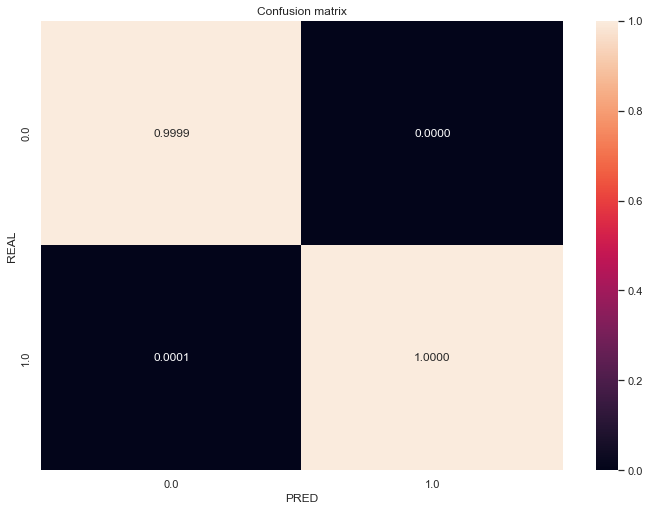



** UnderSampled **
Accuracy Score: 0.99982
Precision Score: 0.9998850970929565


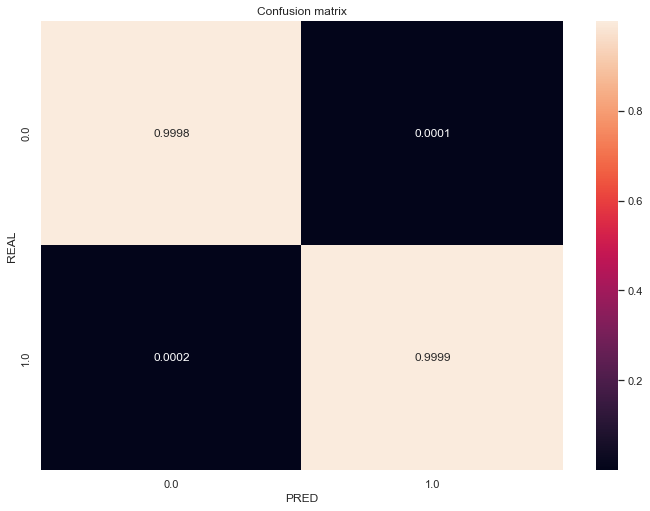



** Smote **
Accuracy Score: 0.99998
Precision Score: 0.9998850970929565


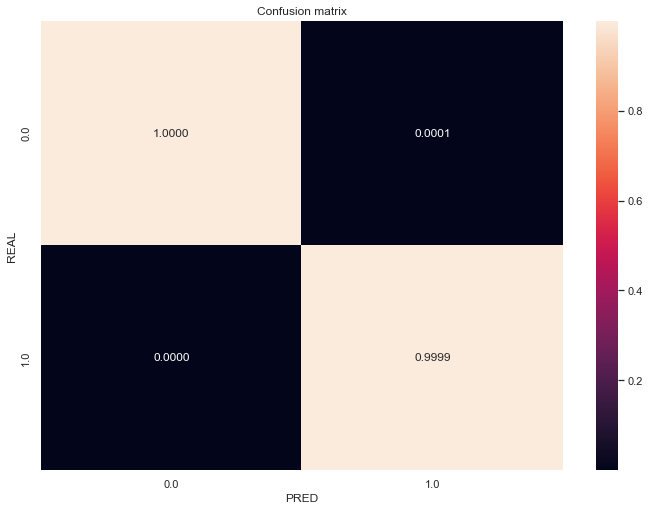






------------------------------ Logistic Regression ------------------------------
** OverSampled **
Accuracy Score: 0.93312
Precision Score: 0.9510513615994485


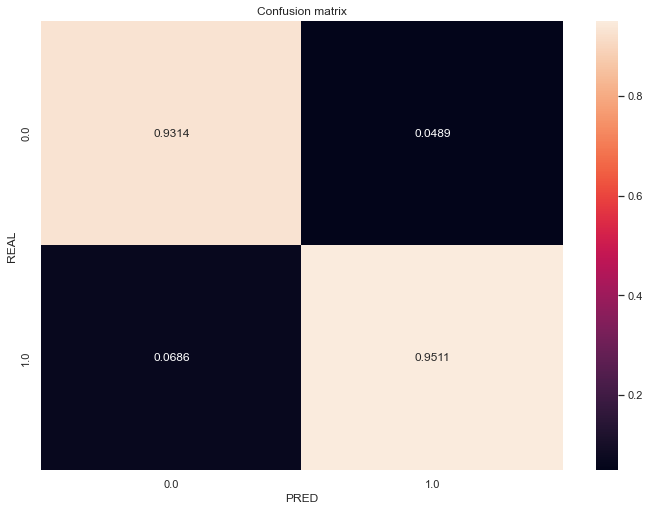



** UnderSampled **
Accuracy Score: 0.93353
Precision Score: 0.9524301964839711


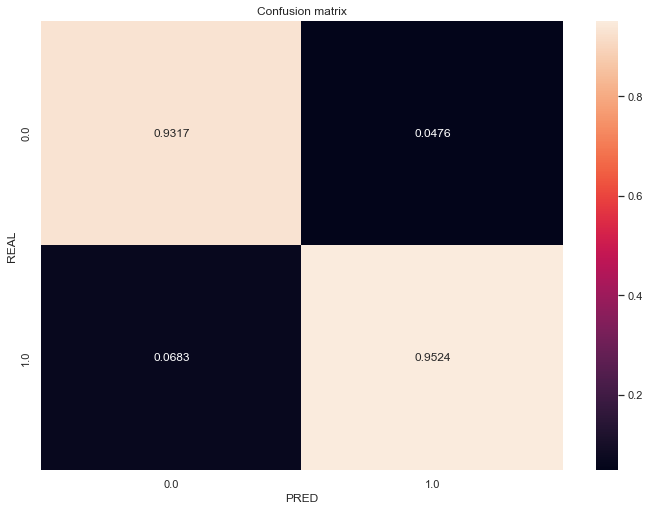



** Smote **
Accuracy Score: 0.93501
Precision Score: 0.9528898081121452


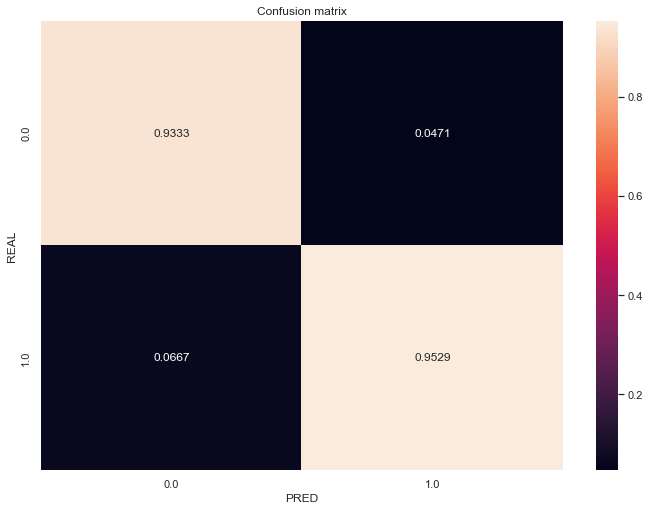






------------------------------ Random Forest ------------------------------
** OverSampled **
Accuracy Score: 0.99999
Precision Score: 0.9998850970929565


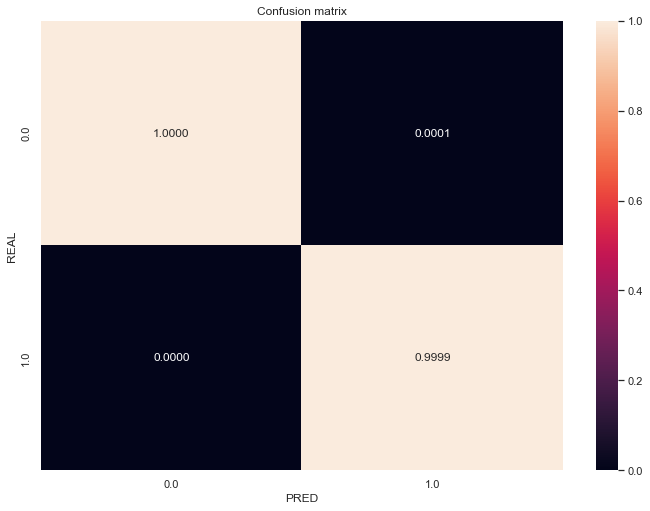



** UnderSampled **
Accuracy Score: 0.99991
Precision Score: 1.0


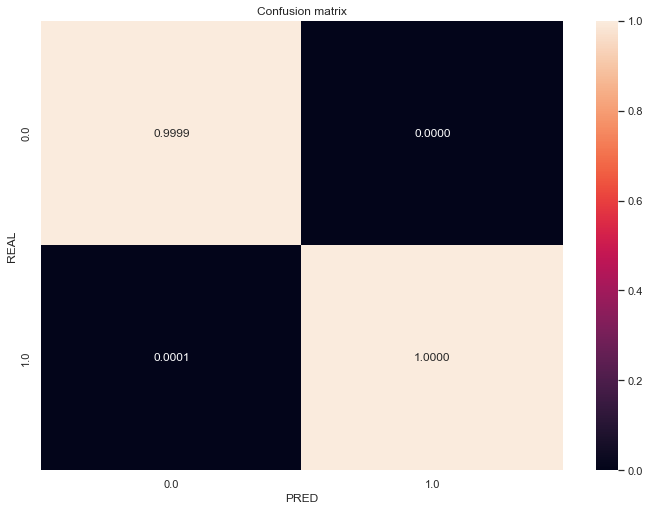



** Smote **
Accuracy Score: 0.99998
Precision Score: 0.999770194185913


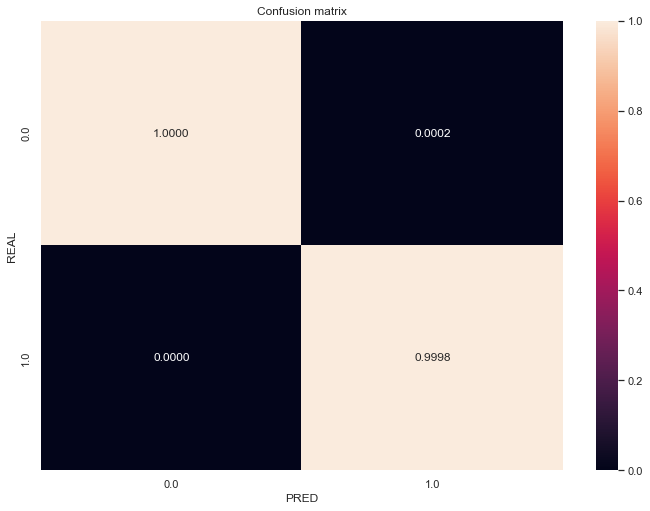






------------------------------ KNeighbors ------------------------------
** OverSampled **
Accuracy Score: 0.96997
Precision Score: 0.9841433988279904


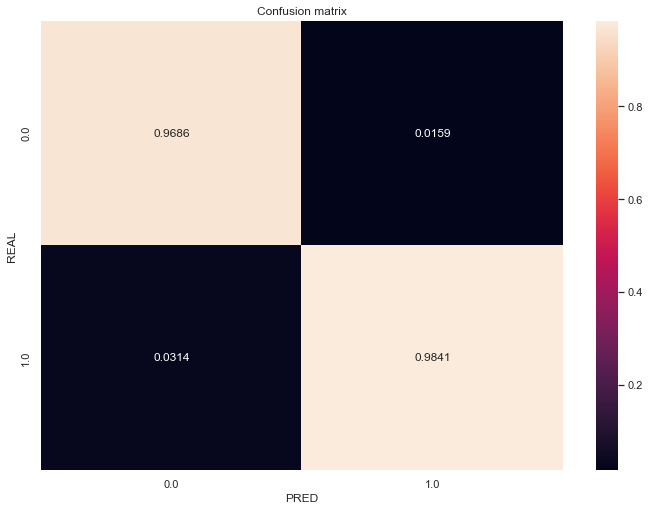



** UnderSampled **
Accuracy Score: 0.92739
Precision Score: 0.9980466505802597


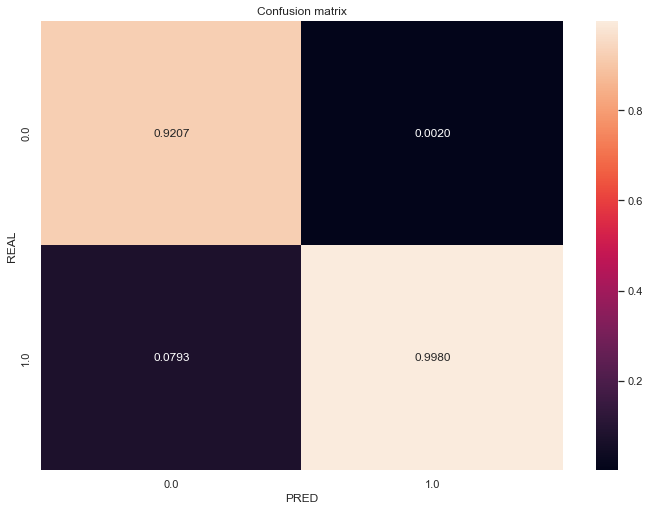



** Smote **
Accuracy Score: 0.96928
Precision Score: 0.986786165689992


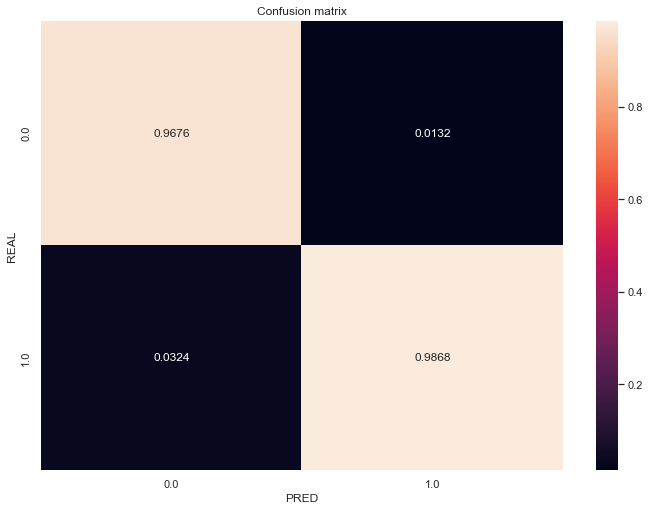

In [19]:
models = {
    "XGBoost": XGBClassifier(
        n_estimators=50, 
        early_stopping_rounds=10,
        learning_rate = 0.1
    ),
    "Logistic Regression": LogisticRegression(max_iter=1000, C=10),
    "Random Forest": RandomForestClassifier(n_estimators=50),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5)
    
}

for name,model in models.items(): 
    print("------------------------------", name,"------------------------------")
    for balMethod, balData in balancedSets.items():
        if name == 'XGBoost':
            model.fit(balData[0], balData[1], eval_set=[(validX, validY)], verbose=False)
        else:
            model.fit(balData[0], balData[1])
        
        prediction = model.predict(testX)
        print("**",balMethod,"**")
        print("Accuracy Score: " + str(accuracy_score(prediction, testY)))
        print("Precision Score: " + str(precision_score(prediction, testY)))
    
        labels = validY.unique()
        confusionMatrix = confusion_matrix(prediction, testY, labels=labels, normalize='pred')
        heatMapData = pd.DataFrame(confusionMatrix , index=labels, columns=labels)
        
        sns.heatmap(heatMapData, annot = True, fmt = '.4f')
        plt.title('Confusion matrix')
        plt.xlabel('PRED')
        plt.ylabel('REAL')
        plt.show()
        
        print('\n')
    print("\n\n")

 ### Final Model (Undersampled Random Forest) Exporting

In [21]:
finalModel = RandomForestClassifier(n_estimators=50)

finalModel.fit(Xundersampled, Yundersampled)

prediction = finalModel.predict(testX)
print("Accuracy Score: " + str(accuracy_score(prediction, testY)))
print("Precision Score: " + str(precision_score(prediction, testY)))


Accuracy Score: 0.99982
Precision Score: 1.0


In [ ]:
pickle.dump(finalModel, open('exportModel.pkl', 'wb'))